In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,7.5)
plt.rcParams.update({'font.size': 20})

In [2]:
#Import dataframe from csv
df = pd.read_csv('OCT6 EO Raw Overall Data.csv', sep=',', engine='python')
df_cb = df[~df.Series.str.contains('TB Bond Vibration')]

#reset index #
N = len(df_cb.index)
df_cb = df_cb.reset_index(drop=True)
df_cb['Time'] = df_cb.Time.str[11:19]

#Rearrange Columns
cols = df_cb.columns.tolist()
cols = cols[-1:] + cols[:-1]

df_cb

,Series,Time,Value (G),Value (m/s^2)
0,CB Bond Vibration,09:05:46,0.043794,0.429181
1,CB Bond Vibration,09:05:46,0.043794,0.429181
2,CB Bond Vibration,09:05:46,0.043794,0.429181
3,CB Bond Vibration,09:05:46,0.043794,0.429181
4,CB Bond Vibration,09:05:46,0.043688,0.428142
...,...,...,...,...
228159,CB Bond Vibration,18:34:19,0.044109,0.432268
228160,CB Bond Vibration,18:34:19,0.044109,0.432268
228161,CB Bond Vibration,18:34:19,0.044109,0.432268
228162,CB Bond Vibration,18:34:19,0.044002,0.431220


In [3]:
#Create Time dataframe with only unique values

time = df_cb['Time'].drop_duplicates()
time = time.reset_index(drop=True)
time = time.drop(time.index[len(time)-1])
time.columns = ['Time']


In [4]:
'''#Average all measurements within the same second
second_averages = pd.DataFrame()

new_index=0
count=1
val_sum=0
data=[]

for i in range(0, len(df_cb.index)-1):
    #Check the time stamp is the same
    if df_cb.iloc[i, 1] ==  df_cb.iloc[i+1, 1]:
        #Add all the values in the time stamp
        count=count+1
        val_sum += df_cb.iloc[i, 2]
    else:
        val_sum += df_cb.iloc[i, 2]
        data.append(val_sum/count)
        count=1
        val_sum=0

second_averages = second_averages.append(data,ignore_index=True)
second_averages = second_averages.rename(columns={0:"Average Values (G)"})
second_averages = second_averages.reset_index(drop=True)
print(second_averages)''';

# A Conditions

    A1 - Target Pressure (3.4 Bar) 16:00:00 - 16:05:00

    A2 - Low Pressure (2.7 Bar) 16:10:00 - 16:15:00

    A3 - V Low Pressure (2.0) 16:17:17 - 16:22:22

    A4 - TPressure again 16:24:22 - 16:29:25

    A5 - High Pressure (4.0 Bar) 16:31:34 - 16:36:33

    A6 - V HIgh Pressure (4.5 Bar) 16:45:27 - 16:52:40

    A7 - TPressure again 16:54:30 - 17:01:49

    A8 - V High Pressure (4.7 Bar) 17:03:01 - 17:05:59

In [5]:
#A1
df_cb.index[df_cb['Time'] == '16:00:02']
df_cb.index[df_cb['Time'] == '16:04:24']

#A4
df_cb.index[df_cb['Time'] == '16:24:22']
df_cb.index[df_cb['Time'] == '16:28:06']

#A7
df_cb.index[df_cb['Time'] == '16:57:12']
df_cb.index[df_cb['Time'] == '17:01:49']

#A2
df_cb.index[df_cb['Time'] == '16:10:00']
df_cb.index[df_cb['Time'] == '16:15:17']
#A3
df_cb.index[df_cb['Time'] == '16:19:02']
df_cb.index[df_cb['Time'] == '16:22:22']
#A5
df_cb.index[df_cb['Time'] == '16:31:34']
df_cb.index[df_cb['Time'] == '16:36:56']
#A6
df_cb.index[df_cb['Time'] == '16:45:27']
df_cb.index[df_cb['Time'] == '16:50:59']
#A8
df_cb.index[df_cb['Time'] == '17:00:00']
df_cb.index[df_cb['Time'] == '17:05:31']
;

''

In [6]:
A1 = df_cb.loc[130204:131400]
A2 = df_cb.loc[137000:141296]
A3 = df_cb.loc[141601:145593]
A4 = df_cb.loc[149000:152358]
A5 = df_cb.loc[155000:155350]
A6 = df_cb.loc[159078:161464]
A7 = df_cb.loc[162738:165000]
A8 = df_cb.loc[164861:167044]

A1 = A1.reset_index(drop=True)
A2 = A2.reset_index(drop=True)
A3 = A3.reset_index(drop=True)
A4 = A4.reset_index(drop=True)
A5 = A5.reset_index(drop=True)
A6 = A4.reset_index(drop=True)
A7 = A7.reset_index(drop=True)
A8 = A7.reset_index(drop=True)

B1 = df_cb.loc[246541-228164:250000-228164]
B1 = B1.reset_index(drop=True)
;
A_array = [A1, A2, A3, A4, A5, A6, A7, A8]

In [7]:
m1 = A1['Value (G)'].mean()
m4 = A4['Value (G)'].mean()
m7 = A7['Value (G)'].mean()
m2 = A2['Value (G)'].mean()
m3 = A3['Value (G)'].mean()
m5 = A5['Value (G)'].mean()
m6 = A6['Value (G)'].mean()
m8 = A8['Value (G)'].mean()
print('The average vibration measurement for condition A1 is:')
print(m1)
print('The average vibration measurement for condition A2 is:')
print(m2)
print('The average vibration measurement for condition A3 is:')
print(m3)
print('The average vibration measurement for condition A4 is:')
print(m4)
print('The average vibration measurement for condition A5 is:')
print(m5)
print('The average vibration measurement for condition A6 is:')
print(m6)
print('The average vibration measurement for condition A7 is:')
print(m7)
print('The average vibration measurement for condition A8 is:')
print(m8);

The average vibration measurement for condition A1 is:
1.0822821954887212
The average vibration measurement for condition A2 is:
1.1631516164766167
The average vibration measurement for condition A3 is:
1.0916710991735517
The average vibration measurement for condition A4 is:
1.0897216192319108
The average vibration measurement for condition A5 is:
1.1335937549857547
The average vibration measurement for condition A6 is:
1.0897216192319108
The average vibration measurement for condition A7 is:
1.0706211944321733
The average vibration measurement for condition A8 is:
1.0706211944321733


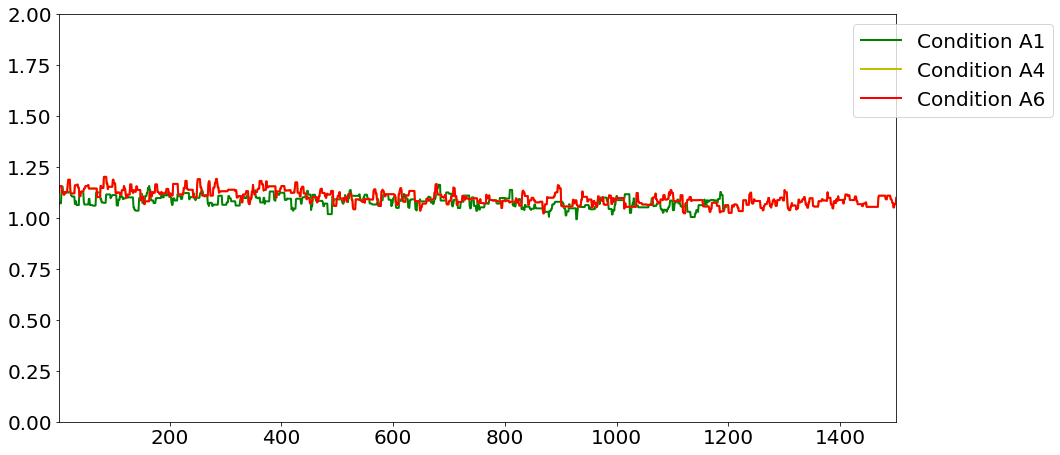

In [104]:
fig, ax = plt.subplots()

ax.set_xlim(1, 1500)
ax.set_ylim(0, 2)
ax = A1['Value (G)'].plot(linewidth='2', color='green', label='Condition A1')
#A2['Value (G)'].plot(ax=ax, linewidth='2',  color='blue', label='Condition A2')
A4['Value (G)'].plot(ax=ax, color='y', linewidth='2', label='Condition A4')
#A5['Value (G)'].plot(ax=ax, color='r', linewidth='2', label='Condition A5')
A6['Value (G)'].plot(ax=ax, color='r', linewidth='2', label='Condition A6')
plt.legend(bbox_to_anchor=(1.2,1), loc='upper right')


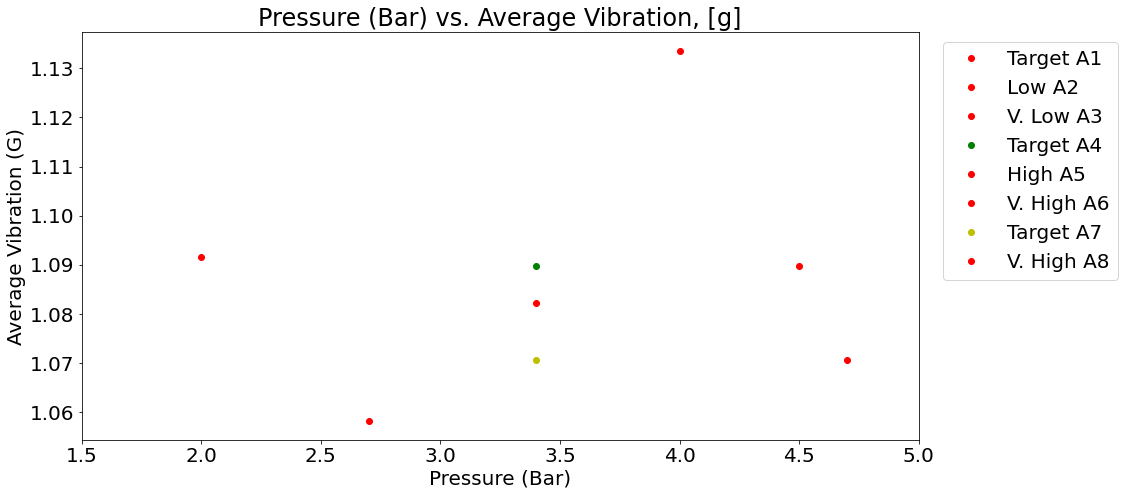

In [109]:
plt.title('Pressure (Bar) vs. Average Vibration')
plt.xlabel('Pressure, [Bar]')
plt.ylabel('Average Vibration, [g]')
plt.xlim(1.5,5)
plt.plot(3.4,m1,'ro', label='Target A1')
plt.plot(2.7,m2,'ro', label='Low A2')
plt.plot(2.0,m3,'ro', label='V. Low A3')
plt.plot(3.4,m4,'go', label='Target A4')
plt.plot(4.0,m5,'ro', label='High A5')
plt.plot(4.5,m6,'ro', label='V. High A6')
plt.plot(3.4,m7,'yo', label='Target A7')
plt.plot(4.7,m8,'ro', label='V. High A8')
plt.legend(bbox_to_anchor=(1.25,1), loc='upper right')

plt.show()

## Control Charting 

In [10]:
#Limits A1

m = A1['Value (G)'].mean()
std = np.std(A1['Value (G)'])
number_std = 3
ucl = m + number_std*std
lcl = m - number_std*std
A1 = A1.assign(Mean=m)
A1 = A1.reset_index(drop=True)


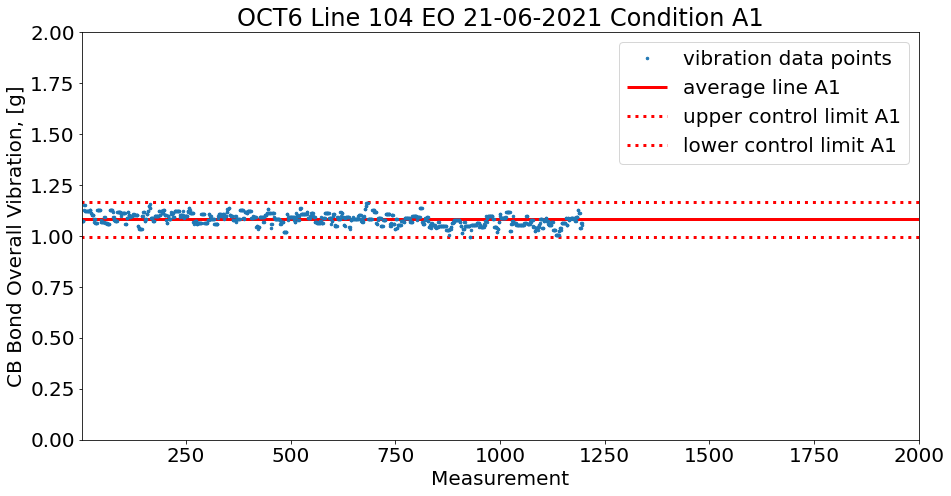

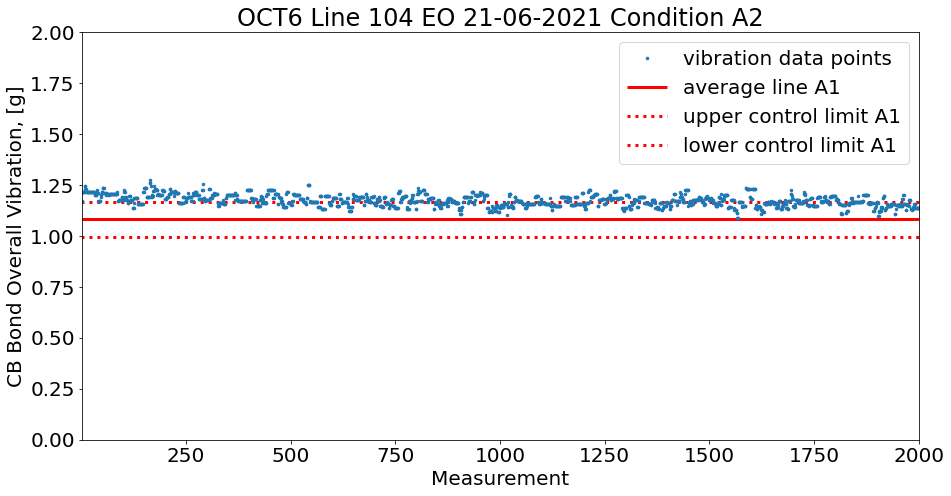

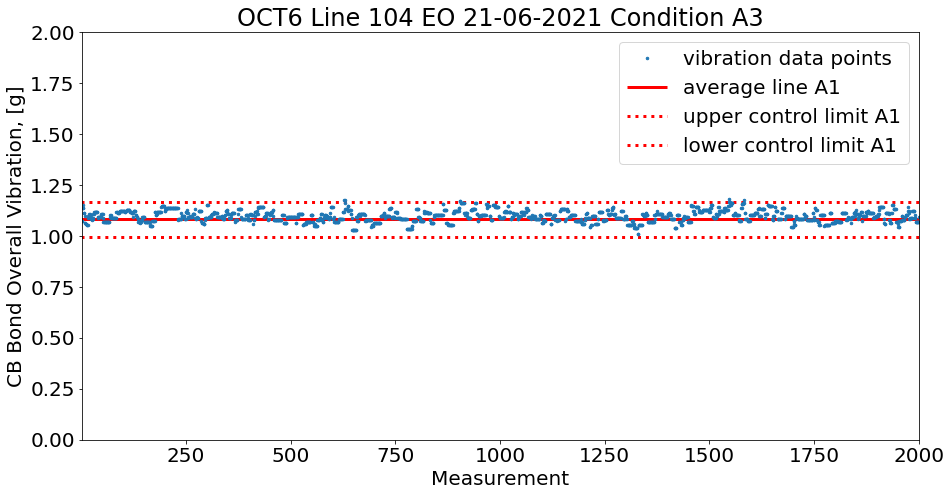

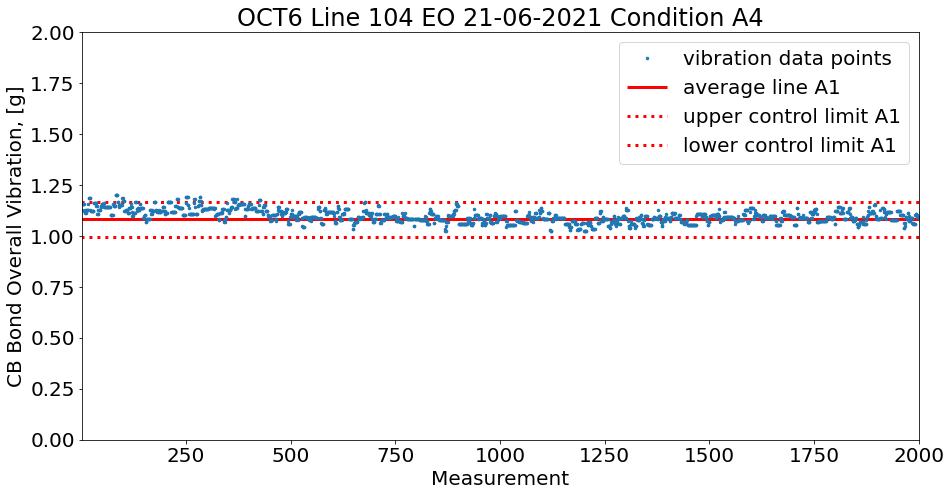

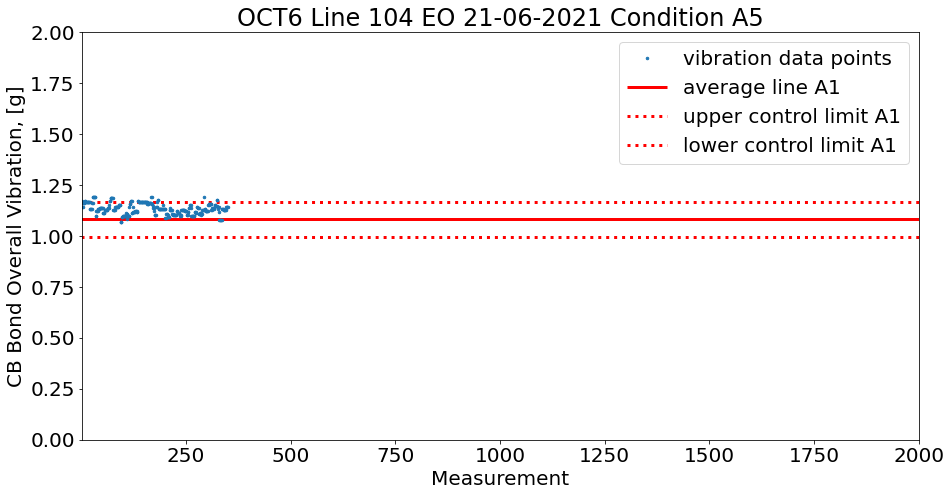

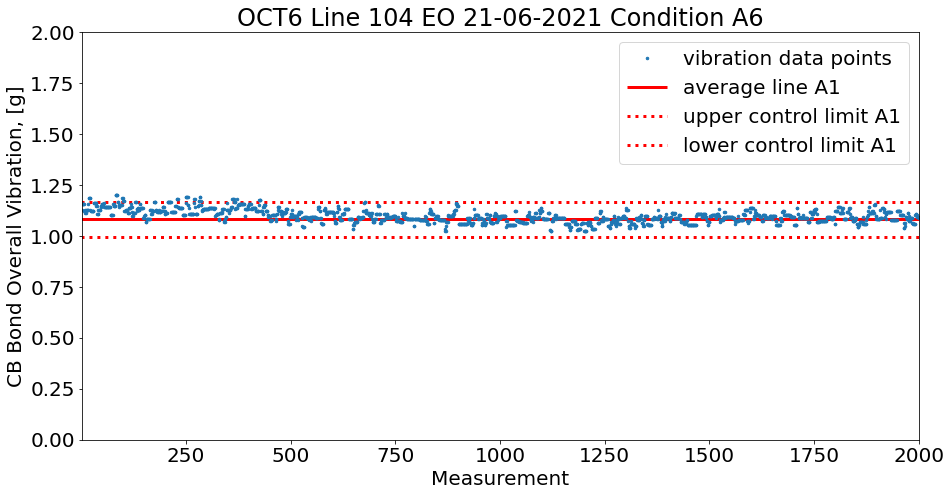

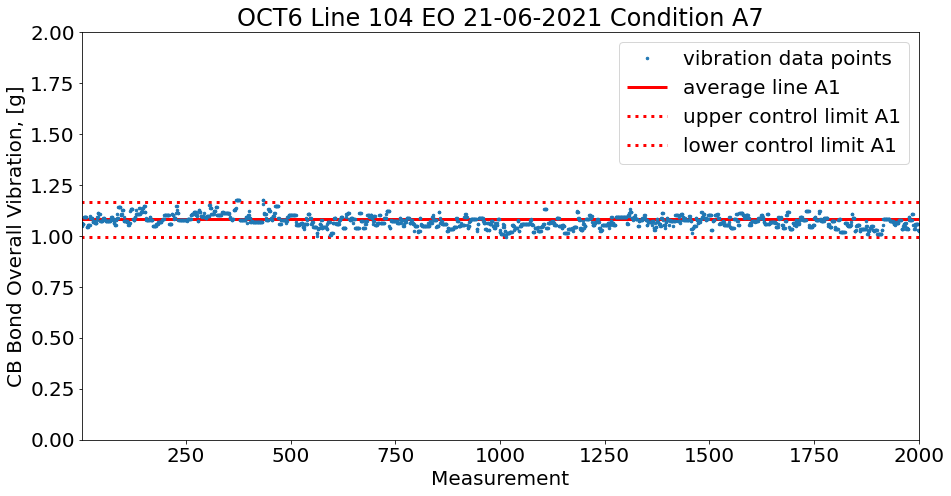

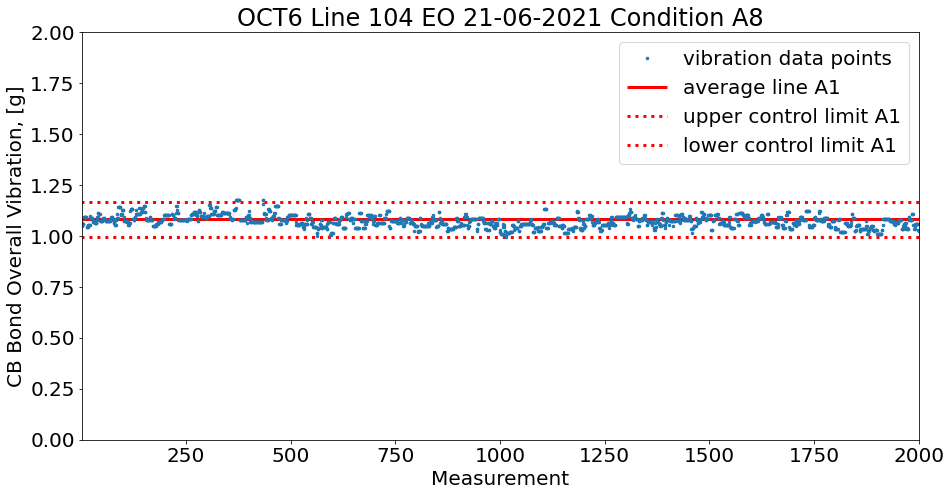

In [11]:
#Plots with A1 as the control 
def get_df_name(df):
    name = [x for x in globals() if globals()[x] is df][0]
    return name

temp1 = 1

for i in A_array:
      
    x = i.index
    y = i['Value (G)']
    temp = 'OCT6 Line 104 EO 21-06-2021 Condition A'
    title = temp + str(temp1)
    temp1 = temp1 + 1
    
    fig, ax = plt.subplots()
    ax.set_xlim(1, 2000)
    ax.set_ylim(0, 2)
    
    plt.plot(x, y, '.', markersize=5, label='vibration data points')
    plt.hlines(y=m, xmin=0, xmax=5000, colors='r', linewidths=3, label='average line A1')
    plt.hlines(y=ucl, xmin=0, xmax=5000, colors='r', linewidths=3, linestyles='dotted', label='upper control limit A1')
    plt.hlines(y=lcl, xmin=0, xmax=5000, colors='r', linewidths=3, linestyles='dotted', label='lower control limit A1')
    plt.title(title)
    plt.xlabel('Measurement')
    plt.ylabel('CB Bond Overall Vibration, [g]')
    plt.legend(loc='upper right')
    ;

In [12]:
#Limits B1
m2 = B1['Value (G)'].mean()
std = np.std(B1['Value (G)'])
number_std2 = 3
ucl2 = m2 + number_std2*std
lcl2 = m2 - number_std2*std
B1 = B1.assign(Mean=m2)
B1 = B1.reset_index(drop=True)
;

''

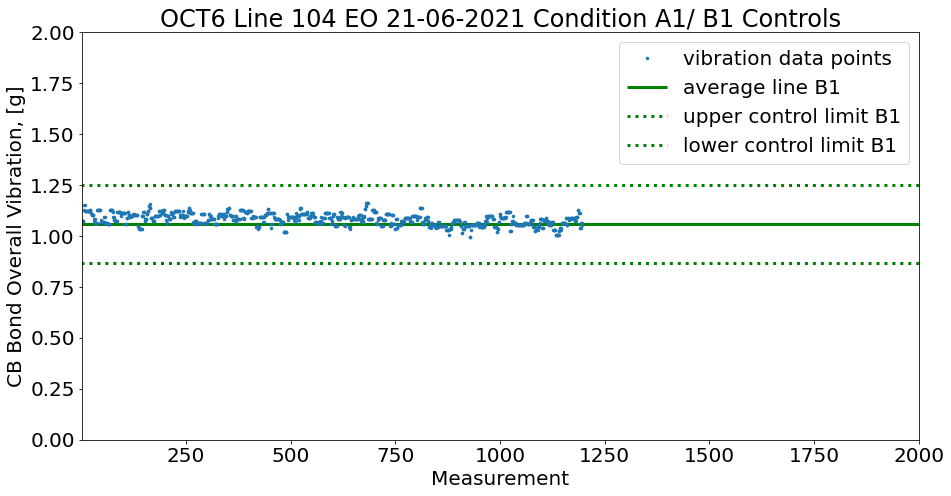

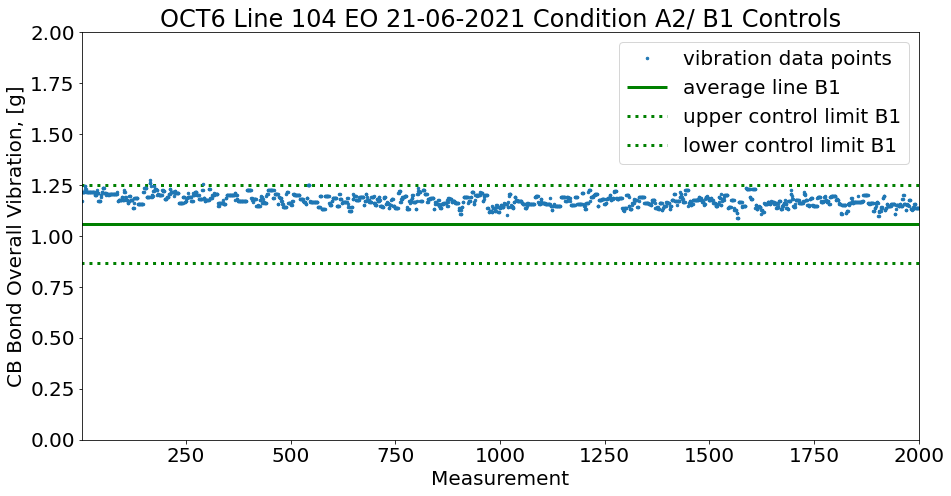

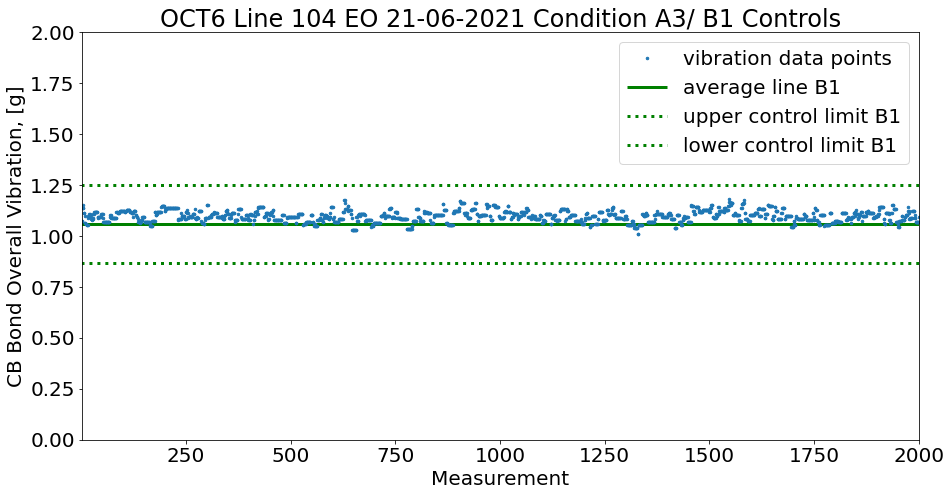

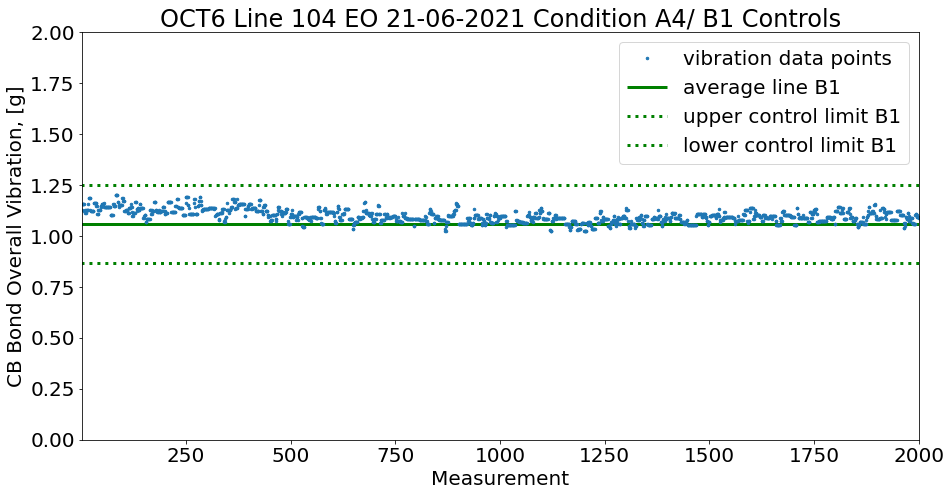

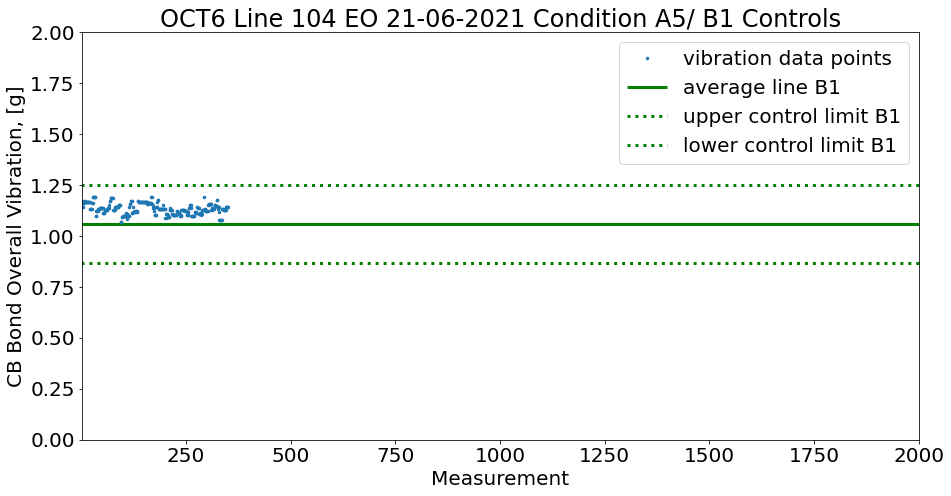

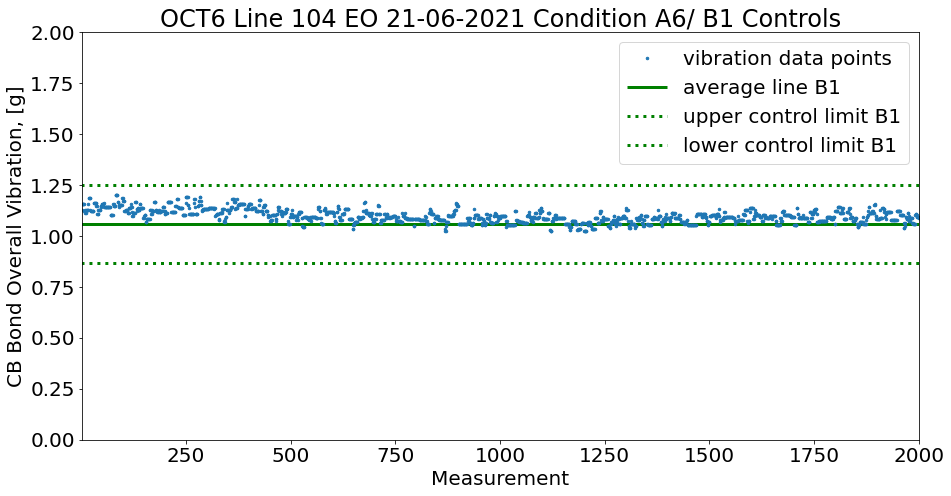

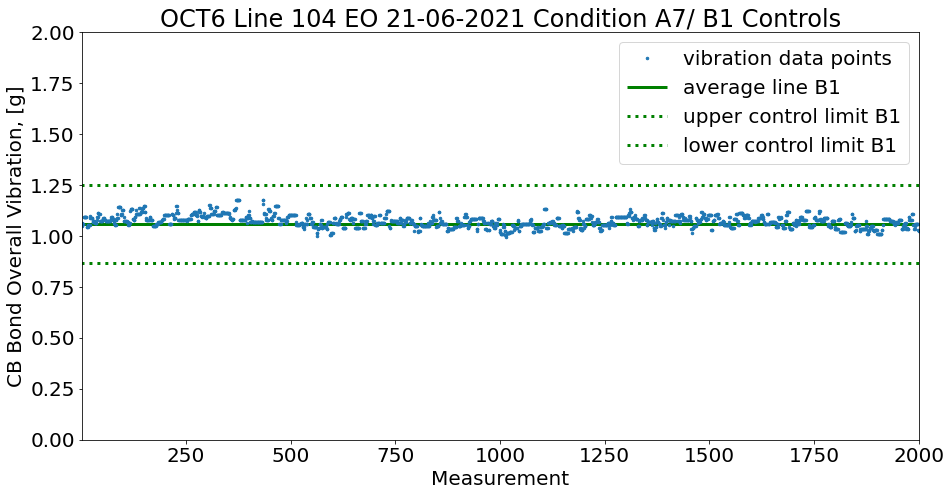

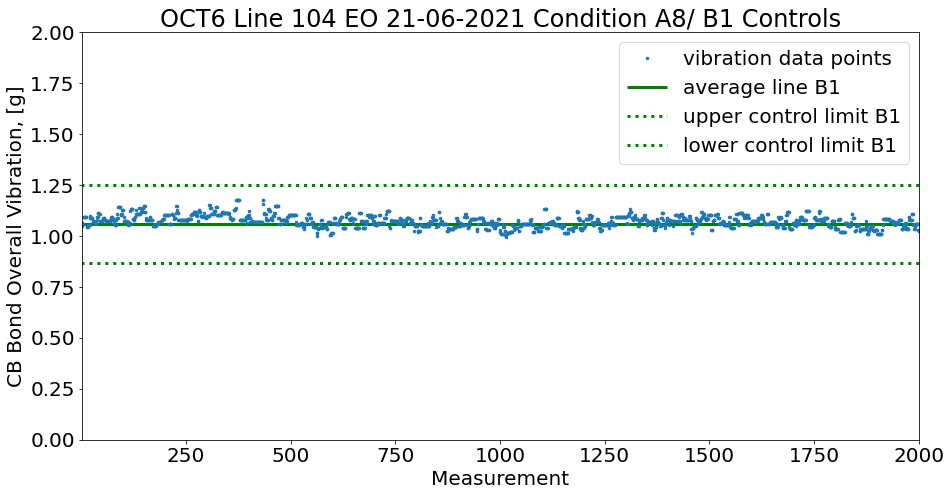

In [13]:
#Plots with B1 as the control 
def get_df_name(df):
    name = [x for x in globals() if globals()[x] is df][0]
    return name

temp1 = 1

for i in A_array:
      
    x = i.index
    y = i['Value (G)']
    temp = 'OCT6 Line 104 EO 21-06-2021 Condition A'
    title = temp + str(temp1) + '/ B1 Controls'
    temp1 = temp1 + 1
    
    fig, ax = plt.subplots()
    ax.set_xlim(1, 2000)
    ax.set_ylim(0, 2)
    
    plt.plot(x, y, '.', markersize=5, label='vibration data points')
    plt.hlines(y=m2, xmin=0, xmax=5000, colors='green', linewidths=3, label='average line B1')
    plt.hlines(y=ucl2, xmin=0, xmax=5000, colors='green', linewidths=3, linestyles='dotted', label='upper control limit B1')
    plt.hlines(y=lcl2, xmin=0, xmax=5000, colors='green', linewidths=3, linestyles='dotted', label='lower control limit B1')
    plt.title(title)
    plt.xlabel('Measurement')
    plt.ylabel('CB Bond Overall Vibration, [g]')
    plt.legend(loc='upper right');
    

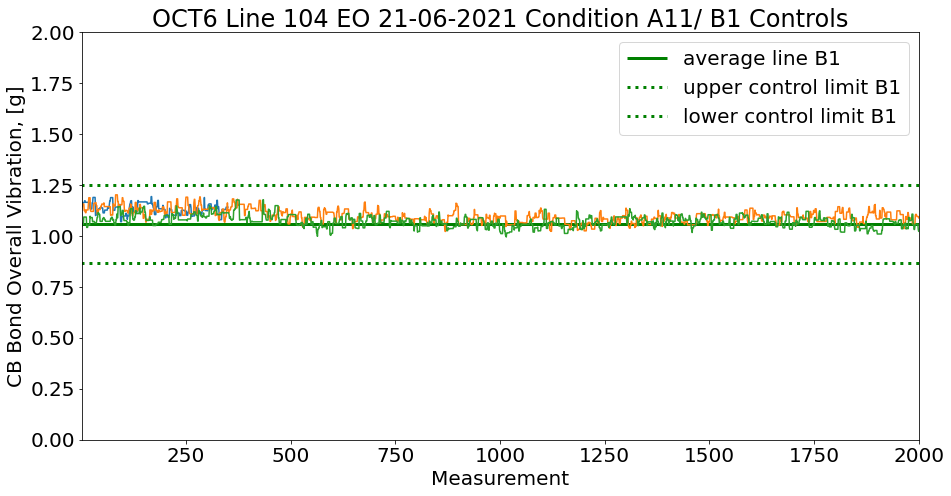

In [102]:
fig, ax = plt.subplots()

x=A5.index
y= A5['Value (G)']

ax.plot(x, y)

x=A6.index
y= A6['Value (G)']

ax.plot(x, y)

x=A8.index
y= A8['Value (G)']

ax.plot(x, y)

ax.set_xlim(1, 2000)
ax.set_ylim(0, 2)

plt.hlines(y=m2, xmin=0, xmax=5000, colors='green', linewidths=3, label='average line B1')
plt.hlines(y=ucl2, xmin=0, xmax=5000, colors='green', linewidths=3, linestyles='dotted', label='upper control limit B1')
plt.hlines(y=lcl2, xmin=0, xmax=5000, colors='green', linewidths=3, linestyles='dotted', label='lower control limit B1')
plt.title(title)
plt.xlabel('Measurement')
plt.ylabel('CB Bond Overall Vibration, [g]')
plt.legend(loc='upper right');

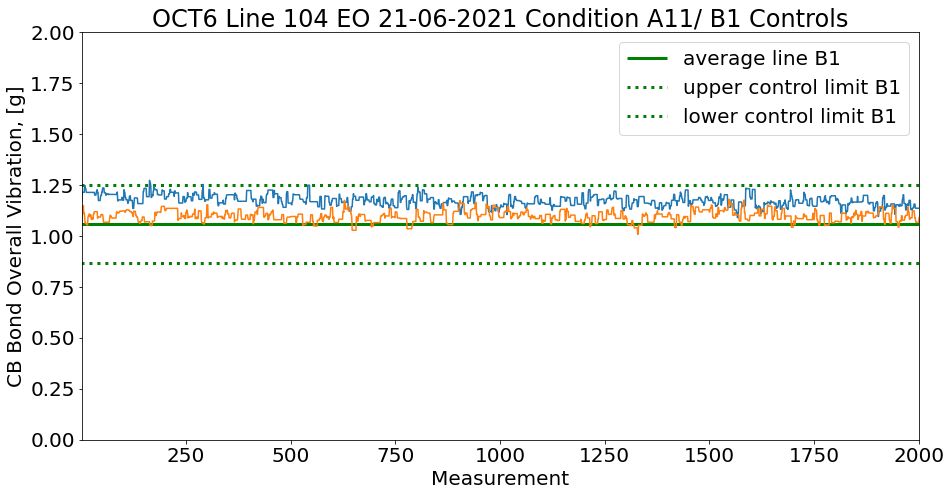

In [103]:
fig, ax = plt.subplots()

x=A2.index
y= A2['Value (G)']

ax.plot(x, y)

x=A3.index
y= A3['Value (G)']

ax.plot(x, y)

ax.set_xlim(1, 2000)
ax.set_ylim(0, 2)

plt.hlines(y=m2, xmin=0, xmax=5000, colors='green', linewidths=3, label='average line B1')
plt.hlines(y=ucl2, xmin=0, xmax=5000, colors='green', linewidths=3, linestyles='dotted', label='upper control limit B1')
plt.hlines(y=lcl2, xmin=0, xmax=5000, colors='green', linewidths=3, linestyles='dotted', label='lower control limit B1')
plt.title(title)
plt.xlabel('Measurement')
plt.ylabel('CB Bond Overall Vibration, [g]')
plt.legend(loc='upper right');

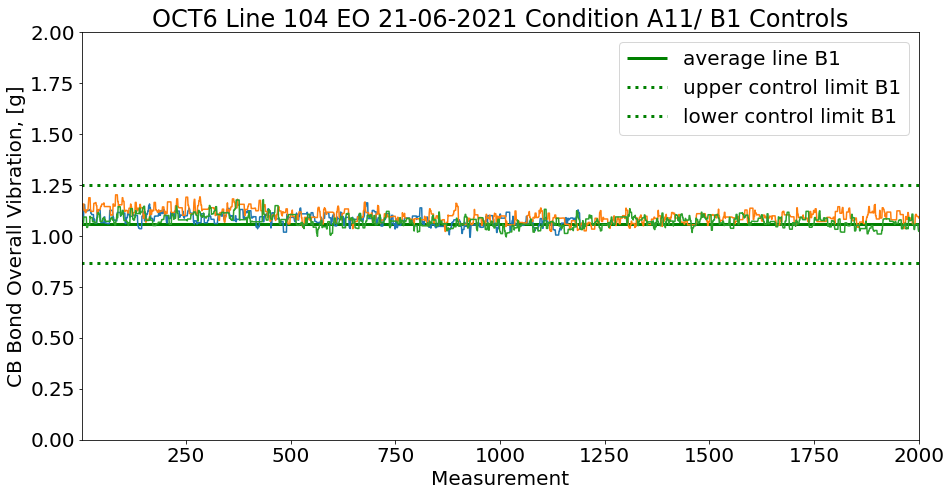

In [105]:
fig, ax = plt.subplots()

x=A1.index
y= A1['Value (G)']

ax.plot(x, y)

x=A4.index
y= A4['Value (G)']

ax.plot(x, y)

x=A7.index
y= A7['Value (G)']

ax.plot(x, y)

ax.set_xlim(1, 2000)
ax.set_ylim(0, 2)

plt.hlines(y=m2, xmin=0, xmax=5000, colors='green', linewidths=3, label='average line B1')
plt.hlines(y=ucl2, xmin=0, xmax=5000, colors='green', linewidths=3, linestyles='dotted', label='upper control limit B1')
plt.hlines(y=lcl2, xmin=0, xmax=5000, colors='green', linewidths=3, linestyles='dotted', label='lower control limit B1')
plt.title(title)
plt.xlabel('Measurement')
plt.ylabel('CB Bond Overall Vibration, [g]')
plt.legend(loc='upper right');

In [14]:
df_cb

,Series,Time,Value (G),Value (m/s^2)
0,CB Bond Vibration,09:05:46,0.043794,0.429181
1,CB Bond Vibration,09:05:46,0.043794,0.429181
2,CB Bond Vibration,09:05:46,0.043794,0.429181
3,CB Bond Vibration,09:05:46,0.043794,0.429181
4,CB Bond Vibration,09:05:46,0.043688,0.428142
...,...,...,...,...
228159,CB Bond Vibration,18:34:19,0.044109,0.432268
228160,CB Bond Vibration,18:34:19,0.044109,0.432268
228161,CB Bond Vibration,18:34:19,0.044109,0.432268
228162,CB Bond Vibration,18:34:19,0.044002,0.431220


In [46]:
#Average all measurements within the same second
second_averages = pd.DataFrame()

new_index=0
count=1
val_sum=0
time
data=[]
times=[]

for i in range(0, len(df_cb.index)-1):
    #Check the time stamp is the same
    if df_cb.iloc[i, 1] ==  df_cb.iloc[i+1, 1]:
        #Add all the values in the time stamp
        count=count+1
        val_sum += df_cb.iloc[i, 2]
        time = df_cb.iloc[i, 1]
    else:
        val_sum += df_cb.iloc[i, 2]
        data.append(val_sum/count)
        times.append(time)
        count=1
        val_sum=0

second_averages = second_averages.append(data,ignore_index=True)

second_averages = second_averages.rename(columns={0:"Average Values (G)"})

second_averages.to_excel('df_cb.xlsx', engine='xlsxwriter')

print('Done')

Done


In [58]:
len(data)

15143

In [59]:
len(times)

15143

In [75]:
data = pd.DataFrame(data)
data = data.rename(columns={0:"Average Values (G)"})
times = pd.DataFrame(times)
times = times.rename(columns={0:"Time (s)"})

In [73]:
s

,Time (s)
0,09:05:46
1,09:05:47
2,09:05:48
3,09:05:49
4,09:05:50
...,...
15138,18:34:14
15139,18:34:15
15140,18:34:16
15141,18:34:17


In [85]:
times.reset_index(drop=True, inplace=True)
data.reset_index(drop=True, inplace=True)

frame = [times, data]
columns = ['Time (s)', 'Value (G)']

second_averages = pd.concat(frame, ignore_index=True,)

In [86]:
second_averages

,Time (s),Average Values (G)
0,09:05:46,NaN
1,09:05:47,NaN
2,09:05:48,NaN
3,09:05:49,NaN
4,09:05:50,NaN
...,...,...
30281,NaN,0.044162
30282,NaN,0.044135
30283,NaN,0.044008
30284,NaN,0.043981


NameError: name 'candlestick2_ohlc' is not defined

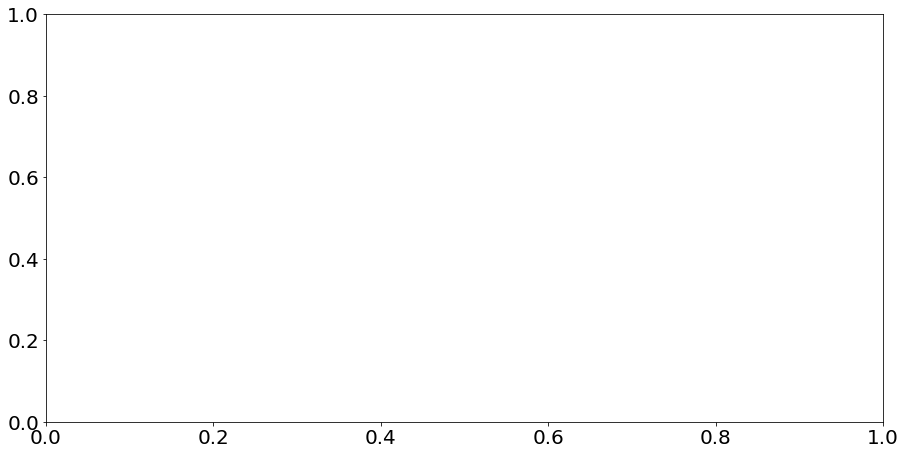

In [110]:
fig, ax = plt.subplots()
candlestick2(ax,quotes['open'],quotes['high'],quotes['low'],quotes['close'],width=0.6)